<a href="https://colab.research.google.com/github/BrayanArismendi1997/Proyecto-Data-Scientist/blob/main/ProyectoDS_Parte3_ArismendiBrayan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.INTRODUCCIÓN

##0.1 Contexto

Hemos sido contratados por parte del gobierno Australiano, con el fin principal de determinar con base en un dataset que se ha recogido a lo largo de todo el país, si es posible predecir si al día siguiente lloverá despues de observar una serie de variables, estas son:

-Fecha: La fecha de observación.

-Ubicación: El nombre común de la ubicación de la estación meteorológica.

-MinTemp: La temperatura mínima en grados centígrados.

-MaxTemp: La temperatura máxima en grados centígrados.

-Precipitaciones: cantidad de lluvia registrada durante el día en mm.

-Evaporación: La denominada evaporación en recipiente Clase A (mm) en el horario de 24 horas hasta las 9 a.m.

-Sol: Número de horas de sol brillante en el día.

-WindGustDir: La dirección de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche.

-WindGustSpeed: La velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche.

-WindDir9am: Dirección del viento a las 9am.

-WindDir3p: Dirección del viento a las 15:00 horas.

-WindSpeed9am: velocidad del viento (km/h) promediada durante 10 minutos antes de las 9 a.m.

-WindSpeed3pm: velocidad del viento (km/hr) promediada durante 10 minutos antes de las 3pm

-Humidity9a: Humedad (porcentaje) a las 9 a.m.

-Humedad3pm: Humedad (porcentaje) a las 3pm.

-Presión9 a. m.: La presión atmosférica (hpa) se redujo al nivel medio del mar a las 9 a. m.

-Presión 3:00 p. m.: La presión atmosférica (hpa) se redujo al nivel medio del mar a las 3:00 p. m.

-Nubosidad9am: Fracción del cielo oscurecida por las nubes a las 9am. Esto se mide en "oktas", que son una unidad de octavos. Registra cuántas octavas partes del cielo están oscurecidas por las nubes. Una medida 0 indica cielo completamente despejado mientras que un 8 indica que está completamente nublado.

-Nubosidad3pm: Fracción de cielo oscurecida por nubes (en "oktas": octavos) a las 15h. Consulte Cload9am para obtener una descripción de los valores.

-Temp9am: Temperatura (grados C) a las 9am.

-Temp3pm: Temperatura (grados C) a las 3pm.

-RainToday: Llovió Hoy.

-RainTomorrow. Loovió Mañana (Variable a predecir).


##0.2 Objetivo

Determinar si en el país de Australia al día siguiente lloverá, a partir de los datos recogidos a lo largo del día.

##0.3 Contexto Comercial

Lo que se pretende con el objetivo anteriormente planteado es lograr la focalización de recursos por parte del gobierno con la idea principal de recolectar la mayor cantidad de agua posible, ya que el país cuenta con serios problemas de abastecimiento de agua, por ende, si logramos predecir con una precisión aprox del 80% si lloverá al día siguiente, el gobierno puede preparar en las diferentes zonas del país el equipo necesarioa para hacer la mayor cantidad de recolección de agua lluvia posible para mitigar las sequias.

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1. Carga de datos

In [155]:
df = pd.read_csv('https://raw.githubusercontent.com/BrayanArismendi1997/BasesdedatosBrayan/main/weatherAUS.csv')

In [156]:
# muestra las columnas del df
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [157]:
# Observamos que tenemos 891 filas y 12 columnas
df.shape

(145460, 23)

In [158]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [159]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#2. Limpieza de datos
2.1 Variables númericas

In [161]:
# Obtenemos las caracteristicas numericas
numericas = [num for num in df.columns if df[num].dtype!='O']
numericas

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

  2.1.1 Tratamiento de valores nulos en las variables numéricas

In [162]:
nulos_num = df[numericas].isnull().sum()
porc_nulos_num = df[numericas].isnull().sum() / df.shape[0] * 100
frame_num = pd.DataFrame({'Valores nulos': nulos_num , 'Porcentaje': porc_nulos_num})
frame_num

,Valores nulos,Porcentaje
MinTemp,1485,1.020899
MaxTemp,1261,0.866905
Rainfall,3261,2.241853
Evaporation,62790,43.166506
Sunshine,69835,48.009762
WindGustSpeed,10263,7.055548
WindSpeed9am,1767,1.214767
WindSpeed3pm,3062,2.105046
Humidity9am,2654,1.824557
Humidity3pm,4507,3.098446


Para aquellas características que poseen cerca o mas del 40% de sus valores como nulos (Evaporation, Sunshine, Cloud3pm, Cloud9am). Seran eliminadas del estudio, ya que al ser un valor tan alto, si las reemplazaramos por el promedio, el análisis se veria perjudicado retornando valores incorrectos o alejados de lo esperado

In [163]:
# Seleccionamos las caracteristicas numericas con un porcentaje de nulos mayor a 20%
drop_num = list(frame_num[frame_num['Porcentaje'] > 20].index)
drop_num

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [164]:
df.drop(drop_num, axis=1, inplace=True)

Para el resto de variables numéricas con nulos, seran reemplazadas por el valor promedio de cada una

In [165]:
trat_num = list(frame_num[(frame_num['Porcentaje'] <= 20) & (frame_num['Porcentaje'] > 0)].index)
trat_num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [166]:
for num in trat_num:
    promedio = df[num].mean()
    df[num] = df[num].fillna(promedio)
# Comprobamos el resultado del tratamiento
df[trat_num].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

2.2 Variables Categoricas

In [167]:
# Obtenemos las caracteristicas categoricas
categoricas = [cat for cat in df.columns if df[cat].dtype =='O']
categoricas

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

2.2.1 Tratamiento de valores nulos en las variables categóricas

In [168]:
nulos_cat = df[categoricas].isnull().sum()
porc_nulos_cat = df[categoricas].isnull().sum() / df.shape[0] * 100
frame_cat = pd.DataFrame({'Valores nulos': nulos_cat , 'Porcentaje': porc_nulos_cat})
frame_cat

,Valores nulos,Porcentaje
Date,0,0.000000
Location,0,0.000000
WindGustDir,10326,7.098859
WindDir9am,10566,7.263853
WindDir3pm,4228,2.906641
RainToday,3261,2.241853
RainTomorrow,3267,2.245978


In [169]:
# Obtenemos caracteristicas categoricas con valores nulos
trat_cat = list(frame_cat[frame_cat['Porcentaje'] > 0].index)
trat_cat

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [170]:
for cat in trat_cat:
    moda = df[cat].mode()[0]
    df[cat] = df[cat].fillna(moda)
# Comprobamos el resultado del tratamiento
df[trat_cat].isna().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#3. Hipotesis

3.1 Si la variable temperatura disminuye, hay menor posibilidad de lluvia.

3.2 Si la variable humedad aumenta, hay mayor posibilidad de lluvia

3.3 Si la variable presión sube, hay mayor posibilidad de lluvia.


#4. Análisis Exploratorio de datos

El primer gráfico irá dirigido a identificar la cantidad de lluvia que se ejecutó en los periodos de tiempo en cuestión y dimensionar su tamaño.

4.1 Análisis Univariado.

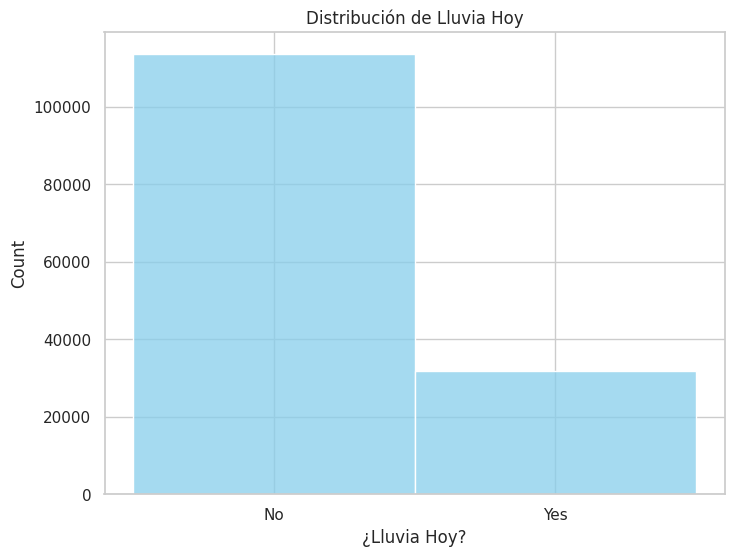

In [171]:
# Personalización de estilo
sns.set(style="whitegrid", palette="pastel")

# Crear el histograma con ajustes
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="RainToday", bins=20, color="skyblue")

# Etiquetas y título
plt.xlabel("¿Lluvia Hoy?")

plt.title("Distribución de Lluvia Hoy")

# Mostrar la gráfica
plt.show()

Cómo se puede observar, la cantidad de veces que se ejecutó la lluvia es inferior en comparación al total de veces que no llovió.

4.2 Análisis Bivariable

A continuación, se pretende iniciar con un análisis bivariado, enfrentando la variable "llovió hoy" VS tres variables que para mi son de relevancia en la ejecución del proyecto de investigación, estas son la humedad, presión y temperatura tanto a las 9am como a las 3pm, seguido vamos a iniciar con el análisis de la temperatura.

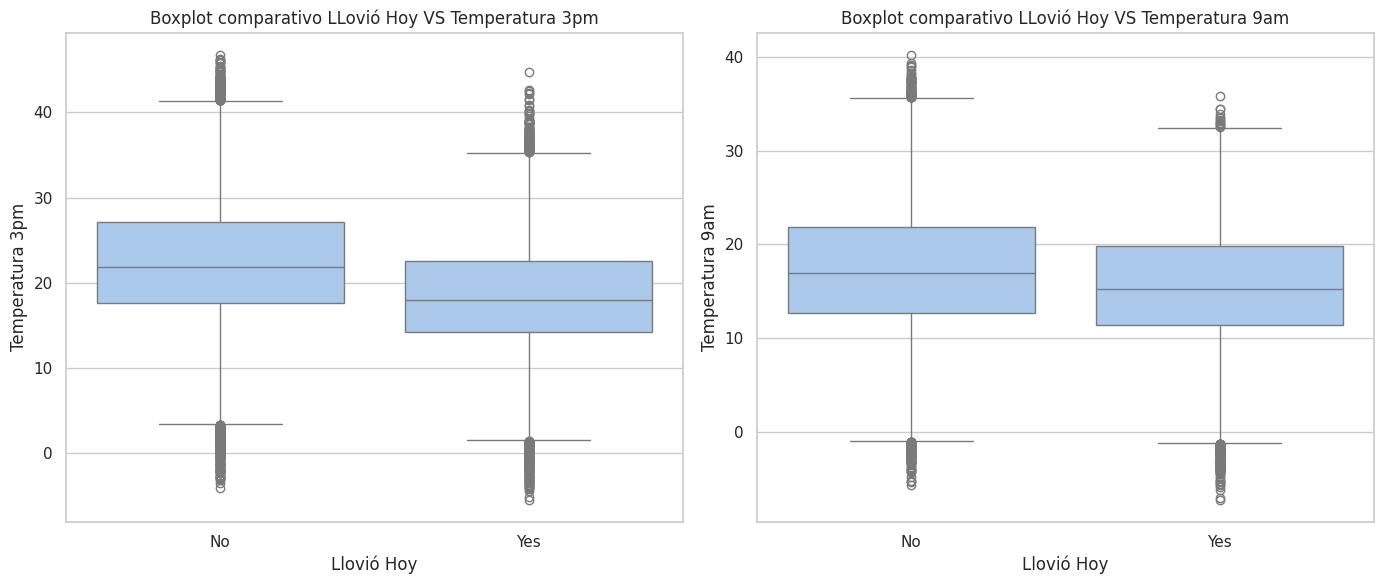

In [172]:
# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot comparativo LLovió Hoy VS Temperatura 3pm
sns.boxplot(x=df.RainToday, y=df.Temp3pm, ax=axes[0])
axes[0].set_title('Boxplot comparativo LLovió Hoy VS Temperatura 3pm')
axes[0].set_xlabel('Llovió Hoy')
axes[0].set_ylabel('Temperatura 3pm')

# Boxplot comparativo LLovió Hoy VS Temperatura 9am
sns.boxplot(x=df.RainToday, y=df.Temp9am, ax=axes[1])
axes[1].set_title('Boxplot comparativo LLovió Hoy VS Temperatura 9am')
axes[1].set_xlabel('Llovió Hoy')
axes[1].set_ylabel('Temperatura 9am')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

De lo anterior concluimos que existe una influencia de la temperatura en las veces que llovió tanto a las 3pm como a las 9am el comportamiento de la media de la temperatura fue menos frente a la media de los días que no llovió.

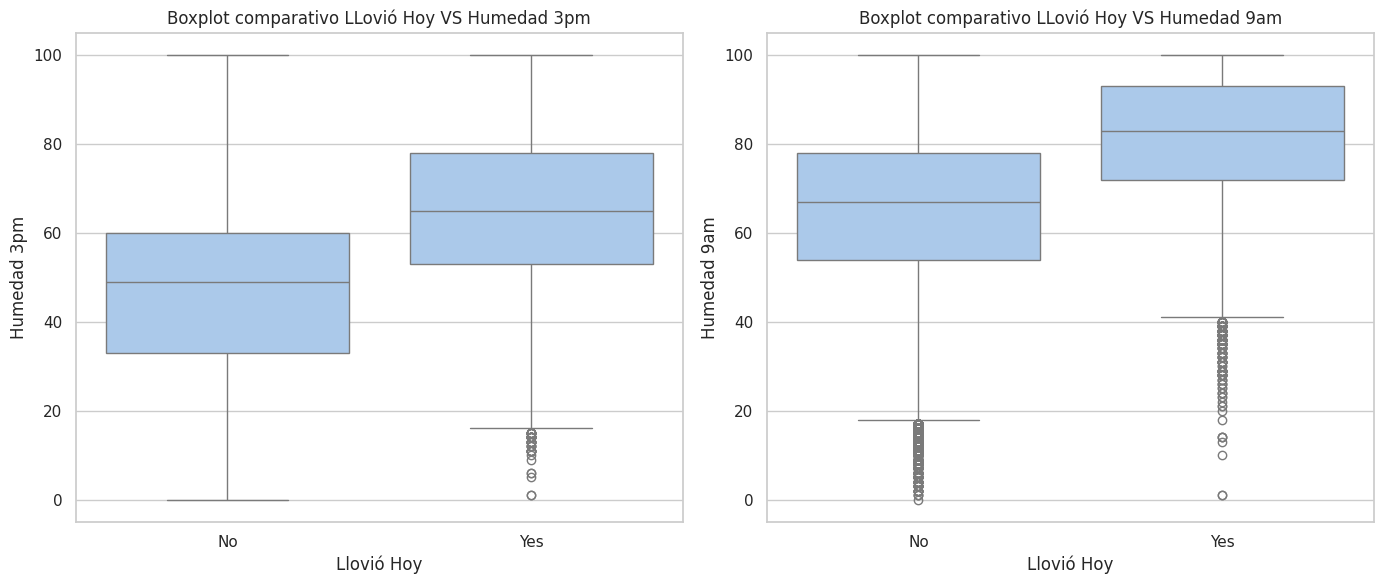

In [173]:
# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot comparativo LLovió Hoy VS Humedad 3pm
sns.boxplot(x=df.RainToday, y=df.Humidity3pm, ax=axes[0])
axes[0].set_title('Boxplot comparativo LLovió Hoy VS Humedad 3pm')
axes[0].set_xlabel('Llovió Hoy')
axes[0].set_ylabel('Humedad 3pm')

# Boxplot comparativo LLovió Hoy VS Humedad 9am
sns.boxplot(x=df.RainToday, y=df.Humidity9am, ax=axes[1])
axes[1].set_title('Boxplot comparativo LLovió Hoy VS Humedad 9am')
axes[1].set_xlabel('Llovió Hoy')
axes[1].set_ylabel('Humedad 9am')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Por su parte, al enfrentar la humedad, tambien se percibe que existe una influencia tanto a las 9am como a las 3pm por parte de esta variable contra las veces que llovió, ya que en ambos escenarios la media de la humedad estuvo por encima de la media de la humedad cuando no llovió. Sin embargo, hay un aspecto adicional, es más marcada la humedad de las 9am frente a las veces que llovió con una media mucha más alta, es decir, que todas las veces que llovió la media de la humedad a las 9am se ubicó por encima de la media de la humedad de los otros escenarios.

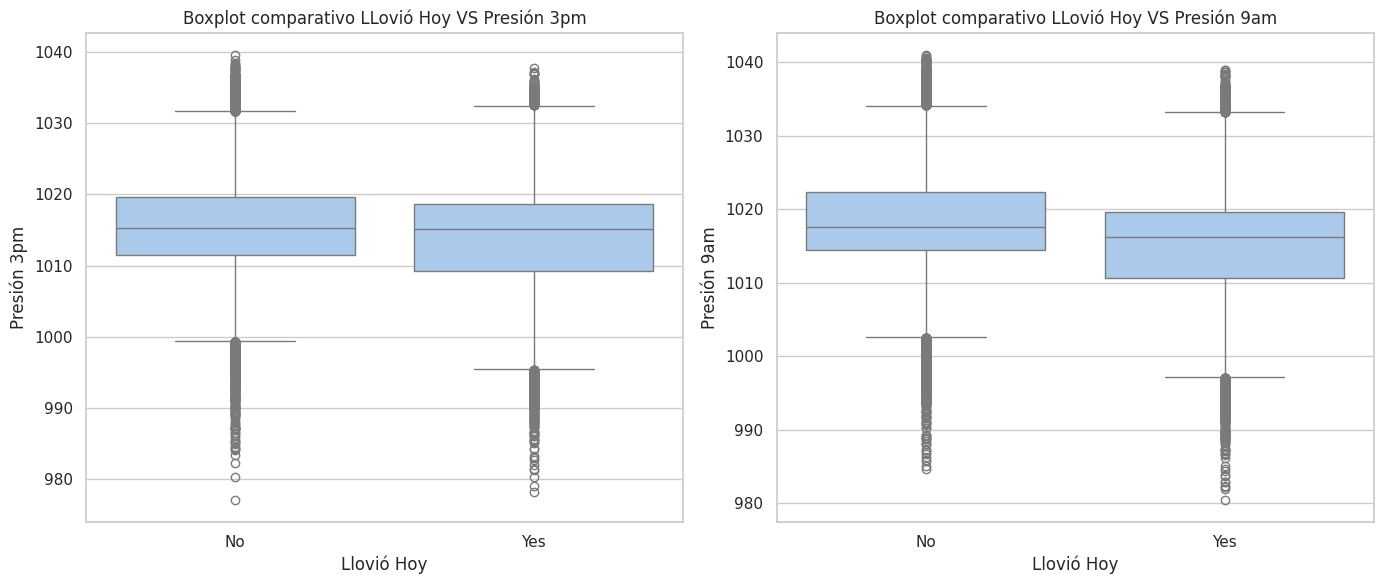

In [174]:
# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot comparativo LLovió Hoy VS Presión 3pm
sns.boxplot(x=df.RainToday, y=df.Pressure3pm, ax=axes[0])
axes[0].set_title('Boxplot comparativo LLovió Hoy VS Presión 3pm')
axes[0].set_xlabel('Llovió Hoy')
axes[0].set_ylabel('Presión 3pm')

# Boxplot comparativo LLovió Hoy VS Presión 9am
sns.boxplot(x=df.RainToday, y=df.Pressure9am, ax=axes[1])
axes[1].set_title('Boxplot comparativo LLovió Hoy VS Presión 9am')
axes[1].set_xlabel('Llovió Hoy')
axes[1].set_ylabel('Presión 9am')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Se percibe que la variable presión no tiene mucha influencia en el comportamiento de la lluvia, ya que la media de la misma en los diferenets escenarios no varia dracticamente, por lo tanto se destacrta para continual con el análisis exploratorio.

#Análisis Multivariante
La idea, es continuar con el análisis exploratorio, esta vez con un análisis en conjunto de tres variables. Antes de iniciar vamos a ver si hay una relación individual de la variable llovió hoy, con respecto a la variable llovió mañana.

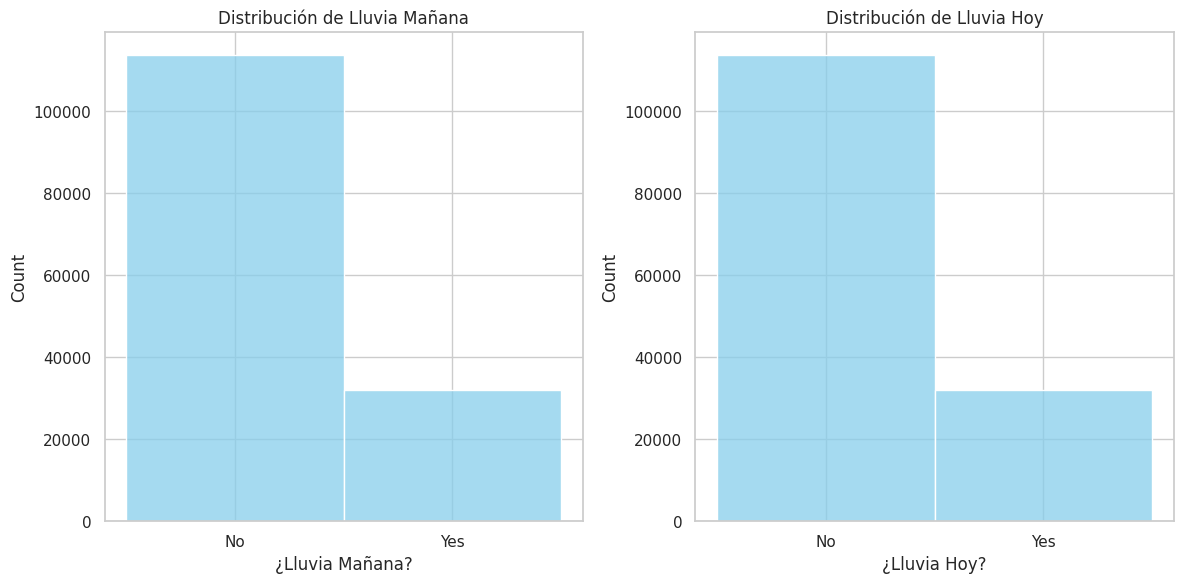

In [175]:
# Personalización de estilo
sns.set(style="whitegrid", palette="pastel")

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Crear el histograma para "RainTomorrow"
sns.histplot(data=df, x="RainTomorrow", bins=20, color="skyblue", ax=axes[0])
axes[0].set_xlabel("¿Lluvia Mañana?")
axes[0].set_title("Distribución de Lluvia Mañana")

# Crear el histograma para "RainToday"
sns.histplot(data=df, x="RainToday", bins=20, color="skyblue", ax=axes[1])
axes[1].set_xlabel("¿Lluvia Hoy?")
axes[1].set_title("Distribución de Lluvia Hoy")

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Nuestra variable objetivo será "Llovió mañana" en donde con ella se pretenderá predecir su materialización, al compararla con la variable, llovió hot vemos que existe una alta similitud de comportamiento.

4.3 Análisis Multivariable.

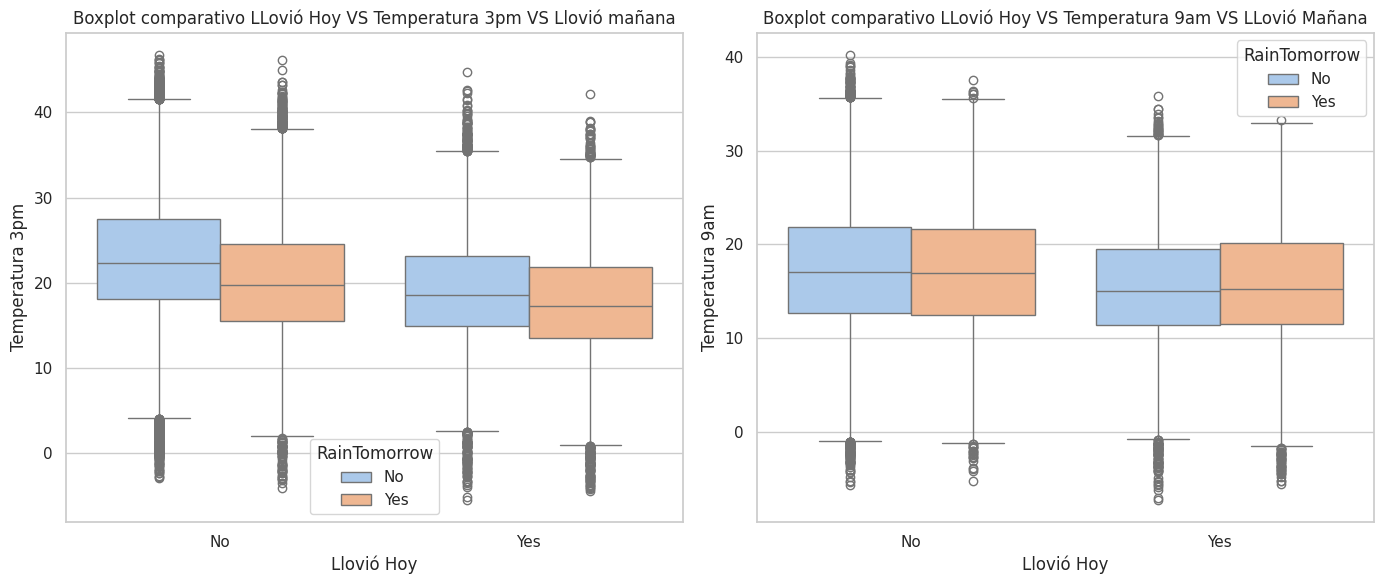

In [176]:
# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot comparativo LLovió Hoy VS Temperatura 3pm
sns.boxplot(x=df.RainToday, y=df.Temp3pm, hue=df.RainTomorrow, ax=axes[0])
axes[0].set_title('Boxplot comparativo LLovió Hoy VS Temperatura 3pm VS Llovió mañana')
axes[0].set_xlabel('Llovió Hoy')
axes[0].set_ylabel('Temperatura 3pm')

# Boxplot comparativo LLovió Hoy VS Temperatura 9am
sns.boxplot(x=df.RainToday, y=df.Temp9am,hue=df.RainTomorrow, ax=axes[1])
axes[1].set_title('Boxplot comparativo LLovió Hoy VS Temperatura 9am VS LLovió Mañana')
axes[1].set_xlabel('Llovió Hoy')
axes[1].set_ylabel('Temperatura 9am')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Una vez descartada la variable presión por no tener influencia gráfica en el comportamiento, he decidido iniciar el análisis multivariable empleando las variables, temperatura, llovió hoy y llovió mañana para observar su comportamiento, de entrada se puede concluir que, las veces que se materializó la lluvia mañana vs la llovia de hoy tiene un comportamiento muy disparejo en el escenario de las 3pm, lo que nos marca que siempre que llovió mañana fue porque la temperatura a las 3pm en cuanto a la media era mucho inferior a las veces que habia llovio el día actual, por su parte, el comportamiento de la temperatura a las 9am es muy similar tanto en el día que llovio actual vs que no, y vs la lluvia materializada del día siguiente.

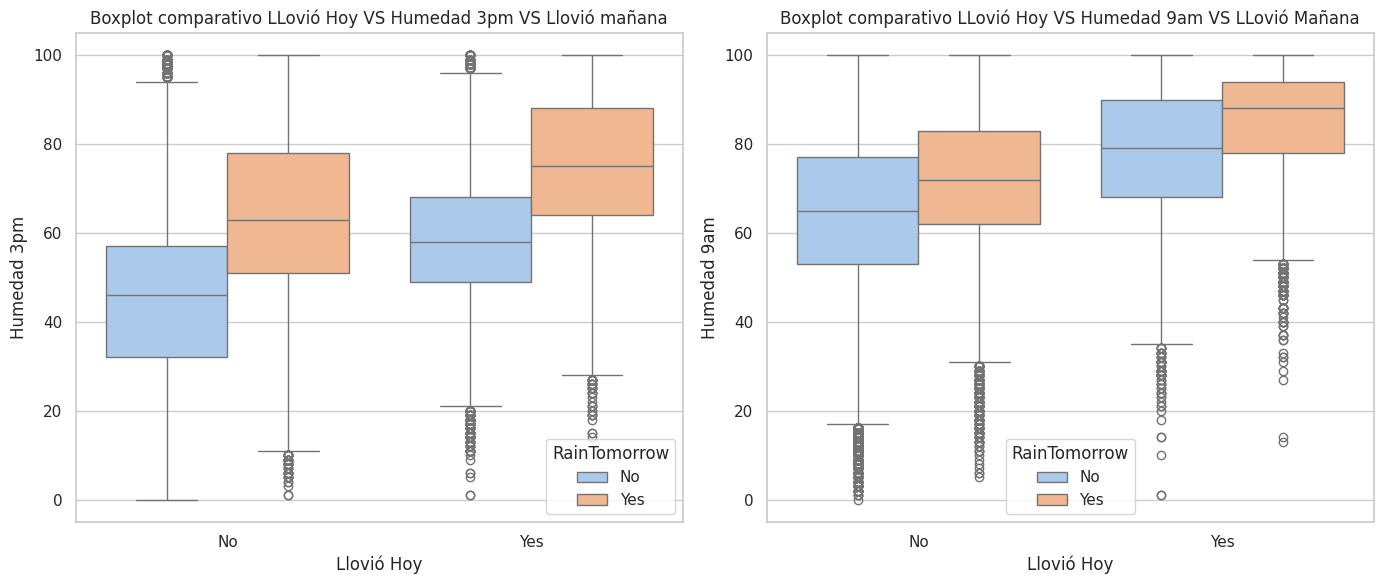

In [177]:
# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot comparativo LLovió Hoy VS Temperatura 3pm
sns.boxplot(x=df.RainToday, y=df.Humidity3pm, hue=df.RainTomorrow, ax=axes[0])
axes[0].set_title('Boxplot comparativo LLovió Hoy VS Humedad 3pm VS Llovió mañana')
axes[0].set_xlabel('Llovió Hoy')
axes[0].set_ylabel('Humedad 3pm')

# Boxplot comparativo LLovió Hoy VS Temperatura 9am
sns.boxplot(x=df.RainToday, y=df.Humidity9am,hue=df.RainTomorrow, ax=axes[1])
axes[1].set_title('Boxplot comparativo LLovió Hoy VS Humedad 9am VS LLovió Mañana')
axes[1].set_xlabel('Llovió Hoy')
axes[1].set_ylabel('Humedad 9am')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

#5. Conclusión preliminar.

Se concluye, que tanto los días que no llovió como que sí a las 3pm, el comprtamiento de la humedad fue considerablemente mayor en las veces que llovió al dia siguiente, en conclusión podriamos decir que si la humedad a las 3pm fue por encima de 60, la probabilidad de que hayan lluvias al otro día es considerablemente alta.

Dandole alcance a las hipotesis anteriormente planteadas se concluye que:

3.1 Si la variable temperatura disminuye, hay menor posibilidad de lluvia.
Esta hipotesis es positiva, ya que se observa según el análisis que a medida que la temperatura disminuye aumentan las probabilidades de lluvia.

3.2 Si la variable humedad aumenta, hay mayor posibilidad de lluvia
Esta hipotesis es positiva, ya que se observa según el análisis que a medidad que la humedad aumenta la probabilidades de lluvia tambien aumentan proporcionalmente.

3.3 Si la variable presión sube, hay mayor posibilidad de lluvia.
Esta hipotesis es negativa, ya que se ejecuta lo contrario, si la presión disminuye las posibilidades de lluvia aumentan.



En conclusión el comportamiento de los escenarios a las 3pm muestran un nivel de correlación muy alto frente a nuestra variable objetivo de estudio.

# 6. Predicciones

Selección de la variable a predecir

Se bucará predecir mediante la clasificacion, si al dia siguiente lloverá, para esto utilizaremos la variable "RainTomorrow" como nuestro target.

A continuación, se redcirá la dimensionalidad a través de la tecnica PCA, para posteriormente utilizar algoritmos de clasificación y se analizarán los resultados obtenidos.

El algoritmo seleccionado es:

Los vecinos más cercanos (KNN, por sus siglas en inglés de "k-nearest neighbors")


Adicionalmente, que como resultado de el análisis preliminar se escogen las variables 'MinTemp', 'MaxTemp', 'Humidity3pm','Temp3pm' para ejecutar las predicciones del modelo, ya que son las que tienen mayor influencia en el mismo.





In [178]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [180]:
df['RainTomorrow'] = df['RainTomorrow'].map( {'No':0, 'Yes': 1})

In [181]:
# tomemos unicamente las variables númericas que impactan el modelo
df2 = df[['MinTemp', 'MaxTemp', 'Humidity3pm','Temp3pm']]
df2.head()

,MinTemp,MaxTemp,Humidity3pm,Temp3pm
0,13.4,22.9,22.0,21.8
1,7.4,25.1,25.0,24.3
2,12.9,25.7,30.0,23.2
3,9.2,28.0,16.0,26.5
4,17.5,32.3,33.0,29.7


In [182]:
# importamos el método que permite utilizar el análisis de componentes principales o PCA
from sklearn.decomposition import PCA

In [183]:
# Creamos la instancia del modelo
modelo_pca = PCA(n_components=4)

# Entrenamos el modelo con nuestros datos
modelo_pca.fit(df2)

PCA(n_components=4)

In [184]:
modelo_pca.components_

array([[ 0.02984933,  0.19972816, -0.9566547 ,  0.20983198],
       [-0.60601524, -0.55875698, -0.24727525, -0.50930454],
       [ 0.79487448, -0.42887542, -0.15272454, -0.40114293],
       [ 0.0053951 , -0.68114989,  0.0184918 ,  0.73189055]])

In [185]:
modelo_pca.explained_variance_ratio_[0]

0.8104861158956795

Vamos a extraer la información del modelo para poderlo interpretar

In [186]:
# Empecemos por los componentes
# para esto usamos .components_
# vamos a guardar esta información en un dataframe, para poderlo ver más facilmente
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4']
componentes = pd.DataFrame(data=modelo_pca.components_, columns = df2.columns, index=lista_componentes)
componentes

,MinTemp,MaxTemp,Humidity3pm,Temp3pm
PC1,0.029849,0.199728,-0.956655,0.209832
PC2,-0.606015,-0.558757,-0.247275,-0.509305
PC3,0.794874,-0.428875,-0.152725,-0.401143
PC4,0.005395,-0.681150,0.018492,0.731891


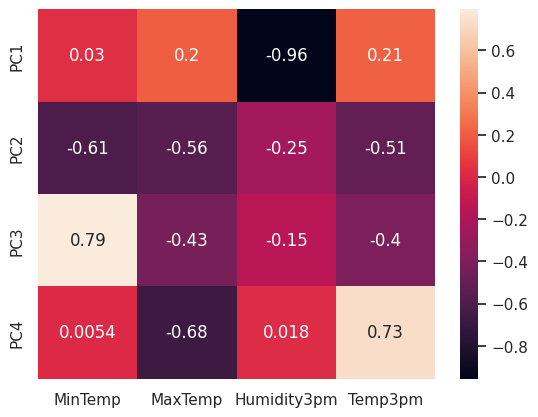

In [187]:
# practiquemos con gráficos, nos ayudan a entender mejor la información
ax = sns.heatmap(componentes, annot=True)

In [188]:
# Veamos la varianza explicada de cada componente
# para eso utilizamos .explained_variance_ratio_
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(2)*100)

['PC1', 'PC2', 'PC3', 'PC4']
[81. 17.  1.  0.]


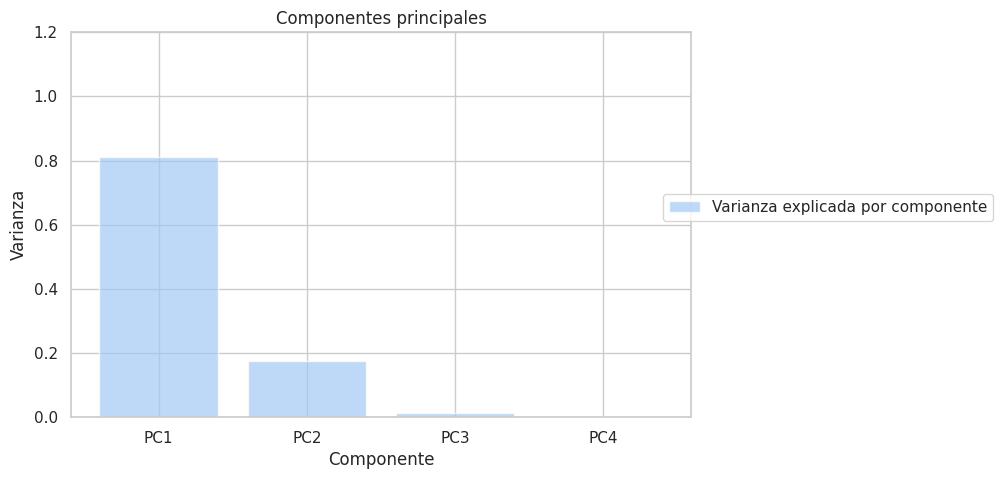

In [189]:
# Practiquemos con gráficos, nos ayudan a entender mejor la información
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(lista_componentes, modelo_pca.explained_variance_ratio_, alpha=0.7, label='Varianza explicada por componente')


ax.set_title('Componentes principales')
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza')
ax.set_ylim(0, 1.2)
ax.legend(bbox_to_anchor = (1.5, 0.6))

In [190]:
# cuando utilizamos .transform estamos calculando la función para cada dato y generando el resultado
# luego lo guardamos en un dataframe para poder utilizarlo más facilmente
proyecciones = pd.DataFrame(modelo_pca.transform(df2), index=df2.index,columns=lista_componentes)
proyecciones

,PC1,PC2,PC3,PC4
0,28.255018,6.693624,5.560980,-0.235493
1,26.169939,7.085363,-1.612823,0.118808
2,21.439859,2.740884,2.179295,-0.972829
3,35.874402,5.479148,-0.933782,-0.403082
4,21.389315,-7.786887,-0.060462,-0.630837
...,...,...,...,...
145455,26.251069,12.037874,-3.625262,-0.157138
145456,29.965043,10.163710,-4.188452,0.034488
145457,27.804104,6.622158,-4.543881,0.180859
145458,27.874732,5.162777,-2.638955,0.052504


En este punto hicimos la transformación pero aún tenemos 4 variables, y como nuestro objetivo es simplificar el problema, debemos escoger con cuantas variables nos vamos a quedar. Para esto podemos usar el siguiente criterio:

In [191]:
proyecciones.drop(columns=['PC3', 'PC4'], inplace=True)

In [192]:
proyecciones

,PC1,PC2
0,28.255018,6.693624
1,26.169939,7.085363
2,21.439859,2.740884
3,35.874402,5.479148
4,21.389315,-7.786887
...,...,...
145455,26.251069,12.037874
145456,29.965043,10.163710
145457,27.804104,6.622158
145458,27.874732,5.162777


Con este criterio podemos ver la gráfica que realizamos previamente, usualmente se considera un buen umbral el 80%, así que con la primera variable ya tendriamos suficiente, no obstante, veamos los histogramas en detalle

In [193]:
# Agreguemos la columna de las especies para poderla utilizar más adelante
proyecciones['RainTomorrow'] = df['RainTomorrow'] # Esto solo funciona por que tienen el mismo index
proyecciones

,PC1,PC2,RainTomorrow
0,28.255018,6.693624,0
1,26.169939,7.085363,0
2,21.439859,2.740884,0
3,35.874402,5.479148,0
4,21.389315,-7.786887,0
...,...,...,...
145455,26.251069,12.037874,0
145456,29.965043,10.163710,0
145457,27.804104,6.622158,0
145458,27.874732,5.162777,0


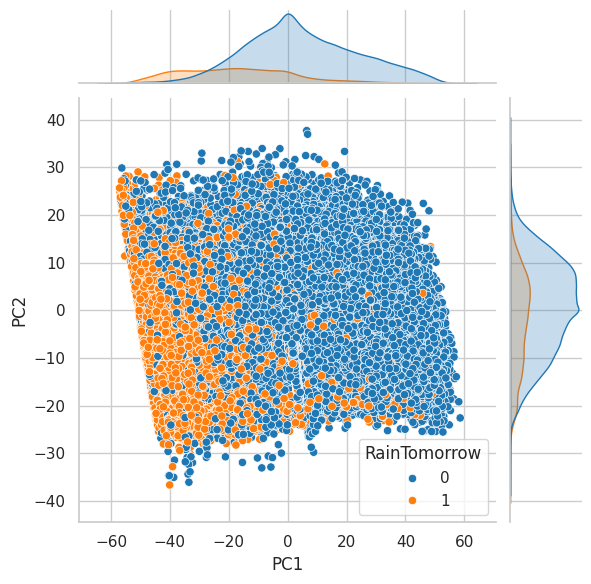

In [194]:
# Practiquemos con un gráfico de seaborn, así podremos ver la distribución y la relación entre las componentes 1 y 2
g = sns.jointplot(x='PC1', y='PC2', data=proyecciones, hue="RainTomorrow", palette="tab10")
g.fig.set_figwidth(6)


In [195]:
proyecciones.RainTomorrow.value_counts()

RainTomorrow
0    113583
1     31877
Name: count, dtype: int64

In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [197]:
proyecciones_features=proyecciones[["PC1", "PC2"]]
proyecciones_features

,PC1,PC2
0,28.255018,6.693624
1,26.169939,7.085363
2,21.439859,2.740884
3,35.874402,5.479148
4,21.389315,-7.786887
...,...,...
145455,26.251069,12.037874
145456,29.965043,10.163710
145457,27.804104,6.622158
145458,27.874732,5.162777


In [198]:
proyecciones_target=proyecciones[["RainTomorrow"]]
proyecciones_target

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
145455,0
145456,0
145457,0
145458,0


In [199]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(proyecciones_features,proyecciones_target,test_size=0.2, random_state=2)
# Creamos un KNN
modelo = KNeighborsClassifier(n_neighbors=2)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [200]:
preds_train = modelo.predict(X_train)
preds_test = modelo.predict(X_test)

In [201]:
preds_test

array([0, 0, 0, ..., 0, 0, 0])

In [202]:
print(metrics.classification_report(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     22634
           1       0.59      0.25      0.35      6458

    accuracy                           0.79     29092
   macro avg       0.70      0.60      0.61     29092
weighted avg       0.77      0.79      0.76     29092



In [203]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     90949
           1       1.00      0.43      0.60     25419

    accuracy                           0.87    116368
   macro avg       0.93      0.71      0.76    116368
weighted avg       0.89      0.87      0.85    116368



In [204]:
# Creando la matriz de confusión
cm2 = confusion_matrix(y_test, preds_test)
cm2

array([[21498,  1136],
       [ 4842,  1616]])

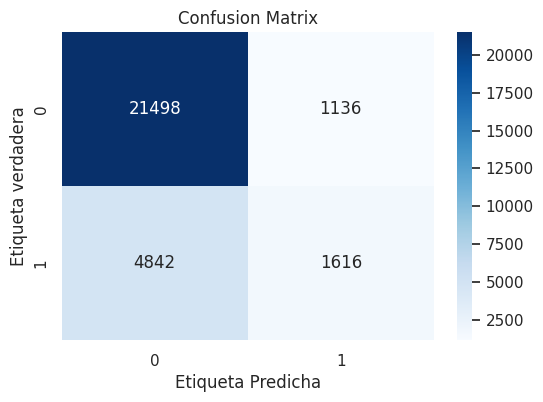

In [205]:
# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta verdadera")
plt.show()
#Clase 1: Llovió
#Clase 0: No llovió

La matriz de confusion muestra 23114 datos predichos correctamente (21498 + 1616) y 5978 datos incorrectos (4842+1136)

En este caso, se distribuyen de la siguiente manera:

En 21498 observaciones donde se declaraba que no llovería, el algoritmo predijo correctamente que no llovería.

En 1616 observaciones donde el resultado era que llovería, el algoritmo predijo correctamente que llovería

En 1136 observaciones donde se declaraba que no llovería, el algoritmo predijo incorrectamente que llovería

En 4842 observaciones donde el resultado era que llovería, el algoritmo predijo incorrectamente que no lloveria.

In [207]:
from sklearn.metrics import precision_score, accuracy_score

acc_nb = accuracy_score(y_test, preds_test)
prec_nb = precision_score(y_test,preds_test)
print('Precision del modelo: ', prec_nb)
print('Accuracy del modelo: ', acc_nb)




Precision del modelo:  0.5872093023255814
Accuracy del modelo:  0.7945139557266603


#7. Conclusión Final

Precision del modelo: 0.5872093023255814

Accuracy del modelo: 0.7945139557266603

La precision puede ser definida como el porcentaje de resultados positivos predecidos correctamente de todos los resultados positivos, es decir el modelo tuvo un 59% de exito al predecir los resultados positivos correctamente.

El accuracy indica el porcentaje de predicciones correctas respecto al total de observaciones, en este caso el modelo obtuvo un 79,5% de predicciones correctas con respecto al total de predicciones realizadas.

De acuerdo a lo anterior, se logró el objetivo de tener una precisión cercana al 80% en la predicción si al día siguiente lloverá con base en la información suministrada.